# Churn?

#### Before we start with the problem itself there are some questions we need to answer:
1. What is the business question? 
-     Givin some information about the customer can you predict if he is going to churn?
2. What each row represent? 
-     Customer
3. What is the evaluation method? 
-     Accuracy 

# Answer these questions:
-       Please note that in is assignment specifically we will not split the data
1. How many columns in the dataset?
2. How many numerical columns in the dataset?
3. How many columns with "null" values in the dataset?
4. What is the column with the biggest number of categories in the data?
5. Show the distribution graph of "MonthlyCharges" using bin size 10, and state what is the most common values?
6. Who is most likely to churn in terms of "SeniorCitizen" column (which value)?
7. What is the most correlated to columns? (you can use function .corr())
8. Show the correlation graph between these two columns.
9. Are the label balanced?

# 1. Important Imports
### Let's start by importing the important libraries.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import numpy as np


In [10]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

# 2. Load Data
### Let's load the data and have a look on it.

In [11]:
df = pd.read_csv("D:\Year 3 Semester 2\GDC_ML\session_2_dataUnderstanding\dataset.csv - dataset.csv.csv")

In [12]:
#output the first five rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,NaN,No,No,34.000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,"1,889.500",No
2,3668-QPYBK,Male,NaN,No,No,2.000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,NaN,No,No,45.000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,"1,840.750",No
4,9237-HQITU,Female,NaN,No,No,2.000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


# 2.1 What is the structure of the data?
### In this section I'll answer these three questions:
### 1. How many columns in the dataset?
### 2. How many numerical columns in the dataset?
### 3. How many columns with "null" values in the dataset?

In [13]:
# output the main info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> The main takeaways are:
> - There are 7043 records.
> - There are 21 columns.
> - There are nulls in 2 columns : SeniorCitizen & tenure.
> - All the columns are objects datatype, except :SeniorCitizen, tenure, MonthlyCharges & TotalCharges are float.
> - There are 21 columns in the dataset.
> - There are 4 numerical columns in the dataset, however SeniorCitizen shouldn't be float.
> - There are 2 columns with null values in the dataset. 


# 2.2 What is the column with the biggest number of categories in the data?

In [32]:
# Discard customerID as each customer will have unique ID
# Discard float columns, and yes and No columns.S
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

> - 'PaymentMethods' is the column with the biggest number of categories in the data : 4.

# 2.3 Show the distribution graph of "MonthlyCharges" using bin size 10, and state what is the most common values?


<AxesSubplot:title={'center':'Number of customers per paid amount'}, xlabel='Paid Amount', ylabel='Number of Customers'>

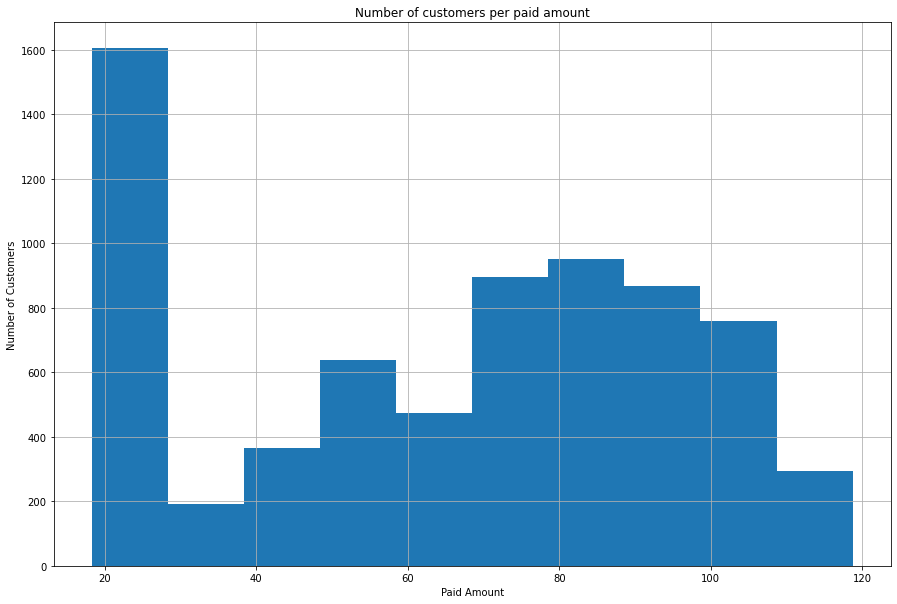

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Paid Amount')
plt.ylabel('Number of Customers')
plt.title('Number of customers per paid amount')

df['MonthlyCharges'].hist(bins=10)

> - The most common value is the range [20:30].

# 2.4 Who is most likely to churn in terms of "SeniorCitizen" column (which value)?

In [29]:
df.groupby(['Churn','SeniorCitizen']).count()['customerID']

Churn  SeniorCitizen
No     0.000            4478
       1.000             666
Yes    0.000            1380
       1.000             476
Name: customerID, dtype: int64

> - The most likely to bt churn is value 0 in SeniorCitizen

# 2.5 What is the most correlated to columns? (you can use function .corr())


In [49]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen           1.000   0.014           0.221         0.103
tenure                  0.014   1.000           0.239         0.822
MonthlyCharges          0.221   0.239           1.000         0.650
TotalCharges            0.103   0.822           0.650         1.000


In [53]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)



                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen             NaN   0.014           0.221         0.103
tenure                    NaN     NaN           0.239         0.822
MonthlyCharges            NaN     NaN             NaN         0.650
TotalCharges              NaN     NaN             NaN           NaN


C:\Users\mkank\AppData\Local\Temp/ipykernel_11128/3432253603.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


> The most corrolated columns are : 
>   - tenure and MonthlyCharges, as they have the biggest correlation value : 0.822 in the correlation matrix.
> And then :
> - MonthlyCharges and TotalCharges with correlation value : 0.650

# 2.6. Show the correlation graph between these two columns.

<AxesSubplot:title={'center':'Correlation between tenure and MonthlyCharges'}, xlabel='MonthlyCharges', ylabel='tenure'>

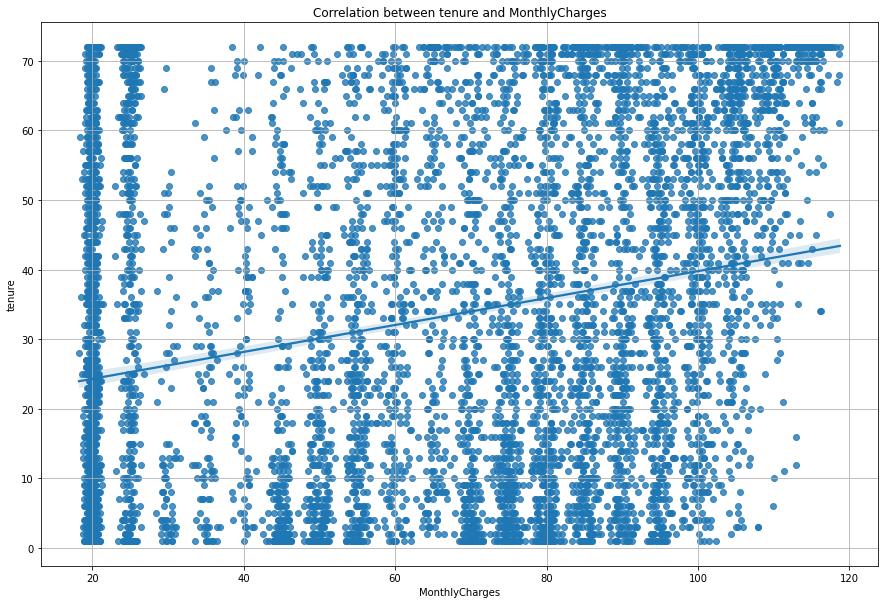

In [63]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
plt.grid()
plt.title("Correlation between tenure and MonthlyCharges")
sns.regplot(x=df["MonthlyCharges"], y=df["tenure"])


<AxesSubplot:title={'center':'Correlation between MonthlyCharges and TotalCharges'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

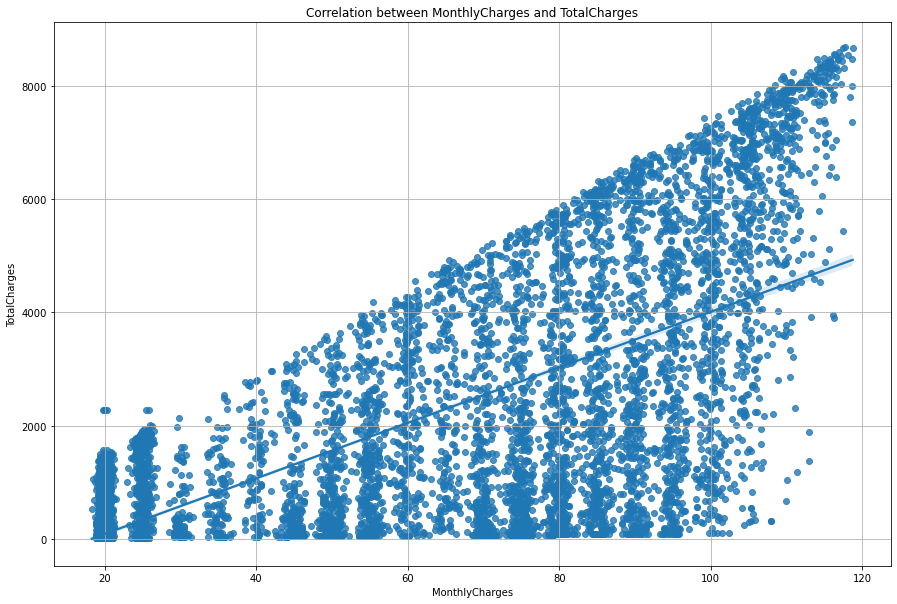

In [62]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
plt.grid()
plt.title("Correlation between MonthlyCharges and TotalCharges")
sns.regplot(x=df["MonthlyCharges"], y=df["TotalCharges"])


# 2.7 Are the label balanced?

In [60]:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

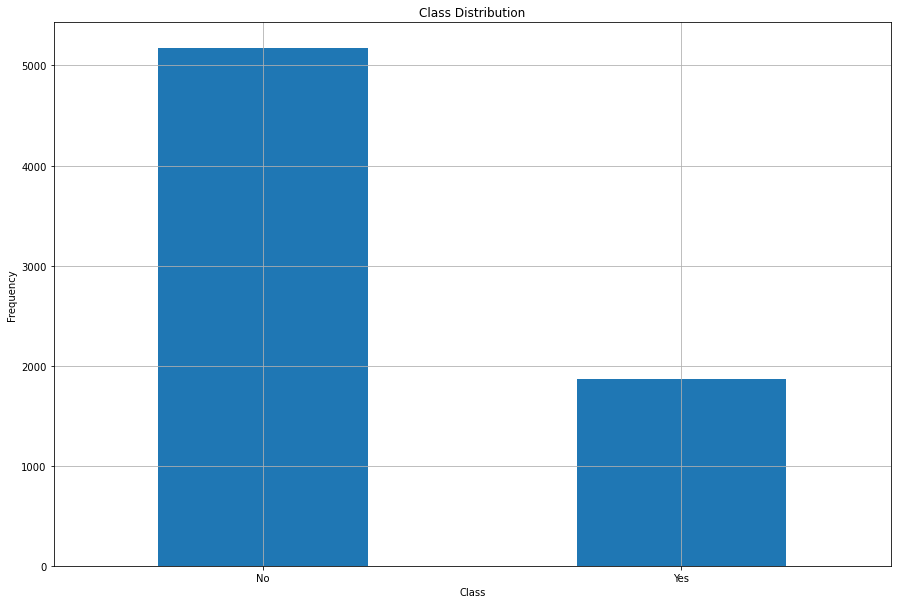

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
count_classes = pd.value_counts(df['Churn'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid()


> - Data is imbalanced.
>-  More than half the data are labeled as 'NO' in churn.    